<a href="https://colab.research.google.com/github/Dmitri9149/TensorFlow_Models_for_NLP/blob/main/Tensorflow_Text_Preprocessing_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text preprocessing for translation with Tensorflow and bin/bash scripting in Google Colab

Logical structure of the project and some code is used from 
d2l.ai project: http://d2l.ai/  


The Wells "Time Machine" book from Gutenberg Project : http://www.gutenberg.org/files/35/35-0.txt is used to test Tokenizer

In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.14.4

     |███████████████████████████████▌| 834.1MB 1.2MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x64b04000 @  0x7f380d5b5615 0x591e47 0x4cc179 0x4cc2db 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
     |████████████████████████████████| 846.0MB 20kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 61kB 1.8MB/s 


In [150]:
import collections
from d2l import tensorflow as d2l
import re

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
LOCATION = "/content//My Drive/Data/TextDatadrive/TimeMachine.txt"
## return list of text lines; ignore punctuation, capitalization
def read_drive_file(location):
    """Load the time machine dataset into a list of text lines."""
    with open("/content/drive/My Drive/Data/TextData/TimeMachine.txt") as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

In [153]:
lines = read_drive_file(LOCATION)
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3564
the project gutenberg ebook of the time machine by h g wells



##### Have to eliminate some lines at the beginning and end of the project (License + some text from the Gutenberg project) 

In [154]:
print(lines[-366:])
lines = lines[:-365]
##print(time_machine[-1:])

['still lived on in the heart of man', '', '', '', '', 'end of the project gutenberg ebook of the time machine by h g wells', '', 'end of this project gutenberg ebook the time machine', '', 'this file should be named txt or zip', 'this and all associated files of various formats will be found in', 'http www gutenberg org', '', 'updated editions will replace the previous one the old editions will', 'be renamed', '', 'creating the works from print editions not protected by u s copyright', 'law means that no one owns a united states copyright in these works', 'so the foundation and you can copy and distribute it in the united', 'states without permission and without paying copyright', 'royalties special rules set forth in the general terms of use part', 'of this license apply to copying and distributing project', 'gutenberg tm electronic works to protect the project gutenberg tm', 'concept and trademark project gutenberg is a registered trademark', 'and may not be used if you charge for t

In [155]:
print(lines[-2:])

['even when mind and strength had gone gratitude and a mutual tenderness', 'still lived on in the heart of man']


In [156]:
print(lines[0:60])

['the project gutenberg ebook of the time machine by h g wells', '', 'this ebook is for the use of anyone anywhere in the united states and most', 'other parts of the world at no cost and with almost no restrictions', 'whatsoever you may copy it give it away or re use it under the terms of', 'the project gutenberg license included with this ebook or online at', 'www gutenberg org if you are not located in the united states you ll have', 'to check the laws of the country where you are located before using this ebook', '', 'title the time machine', '', 'author h g wells', '', 'release date july ebook', 'most recently updated october', '', 'language english', '', 'character set encoding utf', '', 'start of this project gutenberg ebook the time machine', '', '', '', '', 'the time machine', '', 'an invention', '', 'by h g wells', '', '', 'contents', '', 'i introduction', 'ii the machine', 'iii the time traveller returns', 'iv time travelling', 'v in the golden age', 'vi the sunset of mankin

In [157]:
lines = lines[56:]
print(lines[0:5])

['introduction', '', '', 'the time traveller for so it will be convenient to speak of him was', 'expounding a recondite matter to us his pale grey eyes shone and']


#### Tokenize

In [158]:
### from d2l.ai
def tokenize(lines, token='word'):
    """Split text lines into word or character tokens."""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('ERROR: unknown token type: ' + token)

In [159]:
### tokens= list of words
tokens = tokenize(lines)
for i in range(11):
    print(tokens[i])

['introduction']
[]
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was']
['expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'pale', 'grey', 'eyes', 'shone', 'and']
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire']
['burnt', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the']
['lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our']
['glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather']
['than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious']
['after', 'dinner', 'atmosphere', 'when', 'thought', 'runs', 'gracefully', 'free', 'of', 'the']


In [160]:
### from d2l.ai
class Vocab:
    """Vocabulary for text."""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # Sort according to frequencies
        counter = count_corpus(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[0])
        self.token_freqs.sort(key=lambda x: x[1], reverse=True)
        # The index for the unknown token is 0
        self.unk, uniq_tokens = 0, ['<unk>'] + reserved_tokens
        uniq_tokens += [token for token, freq in self.token_freqs
                        if freq >= min_freq and token not in uniq_tokens]
        self.idx_to_token, self.token_to_idx = [], dict()
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

def count_corpus(tokens):
    """Count token frequencies."""
    # Here `tokens` is a 1D list or 2D list
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # Flatten a list of token lists into a list of tokens
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [161]:
### supply list of lists of tokens
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]


In [162]:
### tokens = list of words
### tokens[i]= words in sentence with number i
for i in [3,10]:
    print('words:', tokens[i])
### supply list of tokens
    print('indices:', vocab[tokens[i]])

words: ['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was']
indices: [1, 19, 70, 16, 36, 11, 118, 42, 707, 6, 661, 4, 108, 7]
words: ['after', 'dinner', 'atmosphere', 'when', 'thought', 'runs', 'gracefully', 'free', 'of', 'the']
indices: [109, 291, 1471, 78, 77, 3973, 3114, 909, 4, 1]


In [163]:
vocab[['the', 'runs', 'dinner','after']]

[1, 3973, 291, 109]

#### Text frequences

In [164]:
# Since each text line is not necessisarily a sentence or a paragraph, we
# concatenate all text lines
corpus = [token for line in tokens for token in line]
vocab = Vocab(corpus)
### it is intersting to trace the most frequent words
vocab.token_freqs[:200]

[('the', 2272),
 ('i', 1266),
 ('and', 1245),
 ('of', 1160),
 ('a', 818),
 ('to', 684),
 ('was', 552),
 ('in', 543),
 ('that', 443),
 ('my', 441),
 ('it', 437),
 ('had', 354),
 ('me', 281),
 ('as', 270),
 ('at', 244),
 ('for', 221),
 ('with', 217),
 ('but', 205),
 ('time', 203),
 ('were', 158),
 ('this', 152),
 ('on', 137),
 ('you', 137),
 ('then', 134),
 ('his', 129),
 ('there', 126),
 ('he', 123),
 ('from', 122),
 ('have', 122),
 ('they', 122),
 ('all', 118),
 ('one', 118),
 ('into', 114),
 ('little', 114),
 ('not', 114),
 ('so', 113),
 ('upon', 113),
 ('came', 106),
 ('is', 106),
 ('by', 99),
 ('some', 94),
 ('be', 93),
 ('could', 92),
 ('no', 92),
 ('their', 91),
 ('said', 89),
 ('saw', 88),
 ('down', 87),
 ('an', 86),
 ('machine', 86),
 ('them', 86),
 ('very', 85),
 ('which', 85),
 ('or', 84),
 ('we', 82),
 ('now', 79),
 ('what', 77),
 ('been', 75),
 ('her', 75),
 ('like', 74),
 ('these', 74),
 ('out', 73),
 ('seemed', 72),
 ('man', 71),
 ('s', 71),
 ('up', 71),
 ('about', 69),
 (

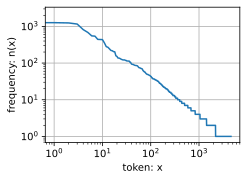

In [165]:
freqs = [freq for (token, freq) in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')
### 11 most frequent
### [('the', 2272),
### ('i', 1266),
### ('and', 1245),
### ('of', 1160),
### ('a', 818),
### ('to', 684),
### ('was', 552),
### ('in', 543),
### ('that', 443),
### ('my', 441),
### ('it', 437)]

In [166]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs[:200]
### there are, but not very many idiomatic phrases

[(('of', 'the'), 308),
 (('in', 'the'), 171),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 103),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73),
 (('i', 'saw'), 68),
 (('i', 'could'), 67),
 (('and', 'i'), 62),
 (('time', 'traveller'), 62),
 (('in', 'a'), 61),
 (('that', 'i'), 61),
 (('for', 'the'), 51),
 (('to', 'me'), 51),
 (('at', 'the'), 50),
 (('into', 'the'), 49),
 (('from', 'the'), 47),
 (('of', 'my'), 47),
 (('upon', 'the'), 46),
 (('for', 'a'), 45),
 (('i', 'felt'), 45),
 (('on', 'the'), 45),
 (('that', 'the'), 44),
 (('was', 'a'), 44),
 (('with', 'a'), 41),
 (('in', 'my'), 40),
 (('said', 'the'), 40),
 (('the', 'morlocks'), 40),
 (('then', 'i'), 39),
 (('was', 'the'), 39),
 (('time', 'machine'), 38),
 (('seemed', 'to'), 37),
 (('had', 'been'), 36),
 (('the', 'same'), 36),
 (('to', 'be'), 36),
 (('and', 'then'), 34),
 (('out', 'of'), 34),
 (('there', 'was'), 34),
 (('a', 'little'), 32),
 (('by', 'the'

In [167]:
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = Vocab(trigram_tokens)
trigram_vocab.token_freqs[:200]

[(('the', 'time', 'traveller'), 61),
 (('the', 'time', 'machine'), 29),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('here', 'and', 'there'), 15),
 (('it', 'was', 'a'), 15),
 (('i', 'did', 'not'), 14),
 (('seemed', 'to', 'me'), 14),
 (('i', 'saw', 'the'), 13),
 (('for', 'a', 'moment'), 12),
 (('i', 'began', 'to'), 12),
 (('i', 'could', 'see'), 12),
 (('out', 'of', 'the'), 12),
 (('said', 'the', 'time'), 12),
 (('a', 'kind', 'of'), 11),
 (('and', 'i', 'was'), 11),
 (('i', 'could', 'not'), 11),
 (('i', 'saw', 'a'), 11),
 (('one', 'of', 'the'), 11),
 (('said', 'the', 'medical'), 11),
 (('the', 'little', 'people'), 11),
 (('the', 'white', 'sphinx'), 11),
 (('i', 'don', 't'), 10),
 (('i', 'had', 'a'), 10),
 (('that', 'i', 'was'), 10),
 (('to', 'me', 'that'), 10),
 (('i', 'did', 'so'), 9),
 (('i', 'had', 'seen'), 9),
 (('i', 'thought', 'of'), 9),
 (('in', 'the', 'end'), 9),
 (('must', 'have', 'been'), 9),
 (('of', 'green', 'porcelain'), 9),
 (('of', 'the', 'morlocks'),

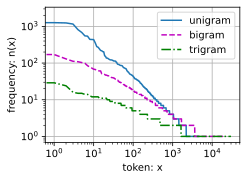

In [168]:
### d2l.ai
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

### Load Data for Translation

The data are from: http://www.manythings.org/bilingual/

In [203]:
import sys
import zipfile
from d2l import tensorflow as d2l
import tensorflow as tf
import os


In [204]:
!wget -cP drive/My\ Drive/Data/TextData 'http://www.manythings.org/anki/fra-eng.zip'

--2020-11-11 10:42:17--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 172.67.173.198, 104.24.108.196, 104.24.109.196, ...
Connecting to www.manythings.org (www.manythings.org)|172.67.173.198|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [205]:
with zipfile.ZipFile('drive/My Drive/Data/TextData/fra-eng.zip', 'r') as f:
  raw_text_fra = f.read('fra.txt').decode("utf-8")

In [206]:
print(raw_text_fra[0:200])

Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)
Hi.	Salut.	CC-BY 2.0 (Fra


In [207]:
!wget -cP drive/My\ Drive/Data/TextData 'http://www.manythings.org/anki/fin-eng.zip'

--2020-11-11 10:42:18--  http://www.manythings.org/anki/fin-eng.zip
Resolving www.manythings.org (www.manythings.org)... 172.67.173.198, 104.24.108.196, 104.24.109.196, ...
Connecting to www.manythings.org (www.manythings.org)|172.67.173.198|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [208]:
with zipfile.ZipFile('drive/My Drive/Data/TextData/fin-eng.zip', 'r') as f:
  raw_text_fin = f.read('fin.txt').decode("utf-8")

In [209]:
print(raw_text_fin[0:200])

Go.	Mene.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #5729273 (awrynai)
Hi.	Moro!	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #3381350 (Silja)
Hi.	Terve.	CC-BY 2.0 (Fra


In [210]:
#!unzip 'drive/My Drive/Data/TextData/fin-eng.zip' -d 'drive/My Drive/Data/TextData' 

In [211]:
#!unzip 'drive/My Drive/Data/TextData/fra-eng.zip' -d 'drive/My Drive/Data/TextData' 

In [212]:
### eliminte attribution
### !cut -d$'\t' -f  1-2 'drive/My Drive/Data/TextData/fra.txt' | head -n 40

In [213]:
### eliminate attribution
!cut -d$'\t' -f  1-2  <'drive/My Drive/Data/TextData/fin.txt'  >fin.new; mv -f fin.new 'drive/My Drive/Data/TextData/fin.txt';
!cut -d$'\t' -f  1-2  <'drive/My Drive/Data/TextData/fra.txt'  >fin.new; mv -f fin.new 'drive/My Drive/Data/TextData/fra.txt';

In [214]:
###  ^I is used to show tabulator 
!cat -T 'drive/My Drive/Data/TextData/fin.txt' | head -n 10

Go.^IMene.
Hi.^IMoro!
Hi.^ITerve.
Run!^IJuokse!
Run!^IJuoskaa!
Run.^IJuokse.
Who?^IKuka?
Wow!^IMahtavaa!
Wow!^ISiistiä!
Wow!^IVau!


In [215]:
FRA_ENG_NAME = 'drive/My Drive/Data/TextData/fra.txt'
FIN_ENG_NAME = 'drive/My Drive/Data/TextData/fin.txt'
def read_data_nmt(file_name):
    with open(file_name, 'r') as f:
        return f.read()

In [216]:
raw_text_fin = read_data_nmt(FIN_ENG_NAME)
raw_text_fra = read_data_nmt(FRA_ENG_NAME)

In [217]:
print(raw_text_fin[:80])

Go.	Mene.
Hi.	Moro!
Hi.	Terve.
Run!	Juokse!
Run!	Juoskaa!
Run.	Juokse.
Who?	Kuka


In [218]:
print(raw_text_fin[:80])

Go.	Mene.
Hi.	Moro!
Hi.	Terve.
Run!	Juokse!
Run!	Juoskaa!
Run.	Juokse.
Who?	Kuka


In [219]:
### Preprocess the Data Set for translation
### from d2l.ai
def preprocess_nmt(text):
    def no_space(char, prev_char):
        return char in set(',.!?') and prev_char != ' '

    # Replace non-breaking space with space, and convert uppercase letters to
    # lowercase ones
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()
    # Insert space between words and punctuation marks
    out = [' ' + char if i > 0 and no_space(char, text[i - 1]) else char
           for i, char in enumerate(text)]
    return ''.join(out)

In [220]:
text_fin = preprocess_nmt(raw_text_fin)
text_fra = preprocess_nmt(raw_text_fra)

In [221]:
print(text_fin[:80])

go .	mene .
hi .	moro !
hi .	terve .
run !	juokse !
run !	juoskaa !
run .	juokse


In [222]:
print(text_fra[:80])

go .	va !
hi .	salut !
hi .	salut .
run !	cours !
run !	courez !
who ?	qui ?
wow


### Tokenize the pairs (eng-fin) ans (eng-fra) for translation

In [223]:
### d2l.ai code 
### tokenize the first num_examples from the translation dataset
### here tokens are words or punctuatio marks
### Return : two lists of token lists: source and target 
### source[i] is a list of tokens from the  ith  text sequence 
### in the source language 

def tokenize_nmt(text, num_examples=None):
    """Tokenize the dataset for translation (sentence pairs)."""
    source, target = [], []
    for i, line in enumerate(text.split('\n')):
        if num_examples and i > num_examples:
            break
        parts = line.split('\t')
        if len(parts) == 2:
            source.append(parts[0].split(' '))
            target.append(parts[1].split(' '))
    return source, target

In [224]:
source_fin, target_fin = tokenize_nmt(text_fin)
source_fin[:6], target_fin[:6]

([['go', '.'],
  ['hi', '.'],
  ['hi', '.'],
  ['run', '!'],
  ['run', '!'],
  ['run', '.']],
 [['mene', '.'],
  ['moro', '!'],
  ['terve', '.'],
  ['juokse', '!'],
  ['juoskaa', '!'],
  ['juokse', '.']])

In [225]:
source_fra, target_fra = tokenize_nmt(text_fra)
source_fra[:6], target_fra[:6]

([['go', '.'],
  ['hi', '.'],
  ['hi', '.'],
  ['run', '!'],
  ['run', '!'],
  ['who', '?']],
 [['va', '!'],
  ['salut', '!'],
  ['salut', '.'],
  ['cours', '!'],
  ['courez', '!'],
  ['qui', '?']])

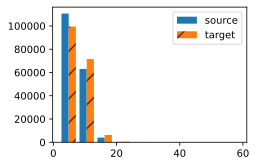

In [226]:
### from d2l.ai
### length of sentences diagrams for france text
d2l.set_figsize()
_, _, patches = d2l.plt.hist(
    [[len(l) for l in source_fra], [len(l) for l in target_fra]],
    label=['source', 'target'])
for patch in patches[1].patches:
    patch.set_hatch('/')
d2l.plt.legend(loc='upper right');

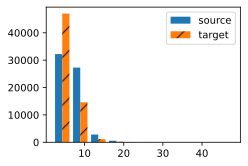

In [227]:
### from d2l.ai
### length of sentences diagrams for finnish text
d2l.set_figsize()
_, _, patches = d2l.plt.hist(
    [[len(l) for l in source_fin], [len(l) for l in target_fin]],
    label=['source', 'target'])
for patch in patches[1].patches:
    patch.set_hatch('/')
d2l.plt.legend(loc='upper right');

### Vocabulary

Add special tokens \<pad>, \<bos>, \<eos>

In [228]:
src_vocab_fin = Vocab(source_fin, min_freq=2,
                      reserved_tokens=['<pad>', '<bos>', '<eos>'])
len(src_vocab_fin)

6492

In [229]:
src_vocab_fra = Vocab(source_fra, min_freq=2,
                      reserved_tokens=['<pad>', '<bos>', '<eos>'])
len(src_vocab_fra)

10348

### Truncate and Pad ; Build Array for Translation

In [230]:
### from d2l.ai
def truncate_pad(line, num_steps, padding_token):
    """Truncate or pad sequences."""
    if len(line) > num_steps:
        return line[:num_steps]  # Truncate
    return line + [padding_token] * (num_steps - len(line))  # Pad

In [231]:
### fin
truncate_pad(src_vocab_fin[target_fin[0]], 10, src_vocab_fin['<pad>'])

[0, 4, 1, 1, 1, 1, 1, 1, 1, 1]

In [232]:
### fra
truncate_pad(src_vocab_fra[target_fra[0]], 10, src_vocab_fra['<pad>'])

[0, 131, 1, 1, 1, 1, 1, 1, 1, 1]

In [233]:
### d2l.ai 
### <eos> token is added to the end of every sequence
### lines are source or target list of list of word indixes
### return the array (tf.constant)(this is data iterator)  
### and the length of sentence 
### without <pad> tokens
def build_array_nmt(lines, vocab, num_steps):
    """Transform text sequences of machine translation into minibatches."""
    lines = [vocab[l] for l in lines]
### vocab['<eos>'] is index of <eos> token
    lines = [l + [vocab['<eos>']] for l in lines]
    array = tf.constant([truncate_pad(
        l, num_steps, vocab['<pad>']) for l in lines])
    valid_len = tf.reduce_sum(
        tf.cast(array != vocab['<pad>'], tf.int32), 1)
    return array, valid_len

### Load Data
The function is the combinations of the functions above  
It returns the data iterator + vocabularies for the source  and target languages

In [234]:
###d2l.ai code
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a TensorFlow data iterator."""
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset

In [235]:
###d2l.ai code (modified)
def load_data_nmt(file_name,batch_size, num_steps, num_examples=600):
    """Return the iterator and the vocabularies of the translation dataset."""
    text = preprocess_nmt(read_data_nmt(file_name))
    source, target = tokenize_nmt(text, num_examples)
    src_vocab = Vocab(source, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = Vocab(target, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
### src_array and tgt-array are now tf.constants
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)
    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)
    data_iter = load_array(data_arrays, batch_size)
    return data_iter, src_vocab, tgt_vocab

In [237]:
train_iter, src_vocab, tgt_vocab = load_data_nmt(FIN_ENG_NAME,batch_size=4, num_steps=10)
for X, X_valid_len, Y, Y_valid_len in train_iter:
    print('X:', tf.cast(X, tf.int32))
    print('valid lengths for X:', X_valid_len)
    print('Y:', tf.cast(Y, tf.int32))
    print('valid lengths for Y:', Y_valid_len)
    break

X: tf.Tensor(
[[14 38  4  3  1  1  1  1  1  1]
 [11 19  5  3  1  1  1  1  1  1]
 [32 10  4  3  1  1  1  1  1  1]
 [31 52  7  3  1  1  1  1  1  1]], shape=(4, 10), dtype=int32)
valid lengths for X: tf.Tensor([4 4 4 4], shape=(4,), dtype=int32)
Y: tf.Tensor(
[[117   4   3   1   1   1   1   1   1   1]
 [ 11  48   5   3   1   1   1   1   1   1]
 [ 11  48   5   3   1   1   1   1   1   1]
 [ 19 228   6   3   1   1   1   1   1   1]], shape=(4, 10), dtype=int32)
valid lengths for Y: tf.Tensor([3 4 4 4], shape=(4,), dtype=int32)
